In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [5]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
df = pd.DataFrame(data['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
x = df

In [13]:
x.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

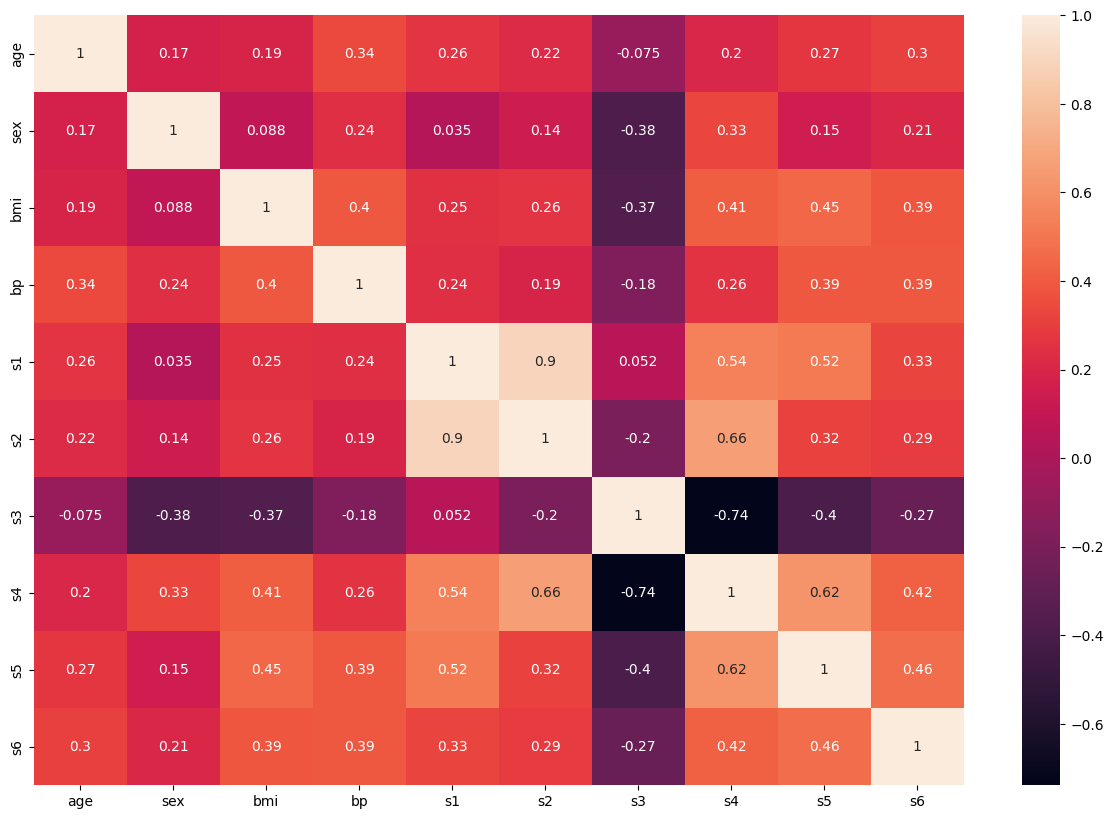

In [14]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(),annot=True)

In [11]:
y = data['target']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [15]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)


DecisionTreeRegressor()

In [24]:
y_pred1 = reg.predict(x_test)

In [25]:
from sklearn.metrics import  r2_score,mean_absolute_error
print(r2_score(y_pred1,y_test))
print(mean_absolute_error(y_pred1,y_test))

-0.2088142241770916
65.0


In [16]:
params = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[2,4,5,8,10,15],
    'max_features':['sqrt', 'log2']

}

In [17]:
regressor = DecisionTreeRegressor()

In [18]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(regressor,param_grid=params,cv = 5,refit=True,verbose=3,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=best;, score=-64.408 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=best;, score=-54.975 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=best;, score=-53.479 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=best;, score=-60.534 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=best;, score=-50.929 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random;, score=-60.897 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random;, score=-60.947 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=sqrt, splitter=random;, score=-52.061

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 5, 8, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=3)

In [19]:
y_pred = grid.predict(x_test)

In [21]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [20]:
from sklearn.metrics import  r2_score,mean_absolute_error
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

-0.78664310924798
57.238707785028595


In [27]:
reg1 = DecisionTreeRegressor(criterion='poisson',max_depth=5,max_features= 'sqrt',splitter='random')

In [28]:
reg1.fit(x_train,y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features='sqrt',
                      splitter='random')

In [29]:
y_pred2 = reg1.predict(x_test)

In [30]:
from sklearn.metrics import  r2_score,mean_absolute_error
print(r2_score(y_pred2,y_test))
print(mean_absolute_error(y_pred2,y_test))

-0.8330734512180067
55.428928190378514


[Text(0.5491071428571429, 0.9166666666666666, 'x[6] <= 0.013\npoisson = 19.231\nsamples = 353\nvalue = 152.918'),
 Text(0.2857142857142857, 0.75, 'x[9] <= 0.03\npoisson = 17.97\nsamples = 241\nvalue = 171.241'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[2] <= -0.024\npoisson = 16.501\nsamples = 167\nvalue = 153.162'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[6] <= -0.05\npoisson = 13.199\nsamples = 50\nvalue = 112.78'),
 Text(0.03571428571428571, 0.25, 'x[8] <= -0.034\npoisson = 1.552\nsamples = 2\nvalue = 73.0'),
 Text(0.017857142857142856, 0.08333333333333333, 'poisson = 0.0\nsamples = 1\nvalue = 88.0'),
 Text(0.05357142857142857, 0.08333333333333333, 'poisson = 0.0\nsamples = 1\nvalue = 58.0'),
 Text(0.10714285714285714, 0.25, 'x[7] <= -0.001\npoisson = 13.337\nsamples = 48\nvalue = 114.438'),
 Text(0.08928571428571429, 0.08333333333333333, 'poisson = 11.44\nsamples = 39\nvalue = 106.564'),
 Text(0.125, 0.08333333333333333, 'poisson = 15.712\nsamples = 9\nvalue = 14

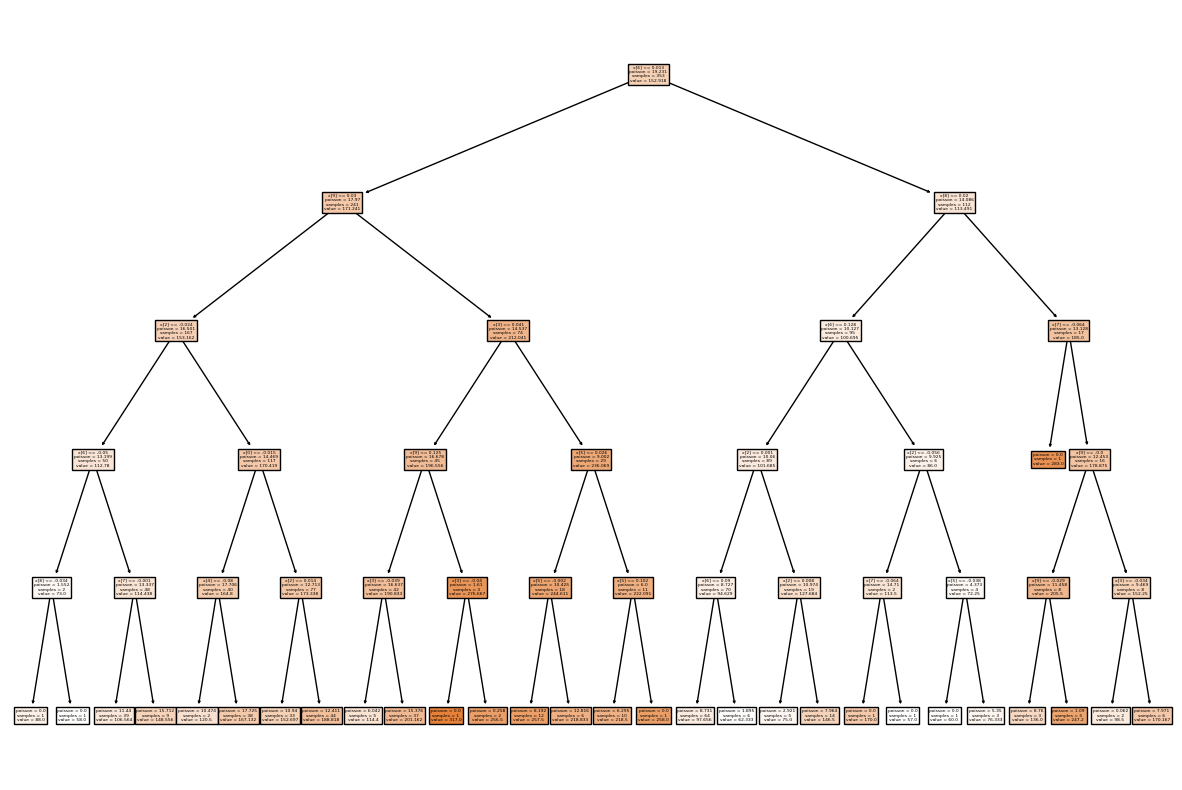

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg1,filled = True)